In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_type_total_230403.csv', encoding="ANSI")      #    <- 김성일 선임님 코드로 생성한 통합 dataset

In [3]:
df.head()

,index,idx,temp,humi,reg_date,C7H8,TMA,VOC,CO2,HCHO,...,NO2,CO,sm_idx,sms,ou,sm_kind,label_org,label_new,안정화,label_type
0,0,5487210,26.79962,6.237793,2023-03-13 12:52:05,0.000000,0.000026,0.192282,435.1554,0.00000,...,0.012979,0.323783,3,2.0,0,고무,2B,NaN,0.0,B
1,1,5487211,26.79962,22.082520,2023-03-13 12:52:06,0.000000,0.000034,0.357748,431.6093,0.00000,...,0.000000,0.291240,3,2.0,0,고무,2B,NaN,0.0,B
2,2,5487212,26.80969,32.678220,2023-03-13 12:52:08,0.000000,0.000045,0.498292,326.9812,0.00000,...,0.000000,0.230189,9,2.0,0,(음식)비린,2B,NaN,0.0,B
3,3,5487213,26.82983,42.065430,2023-03-13 12:52:09,0.000944,0.000057,0.728273,295.0207,0.00000,...,0.000000,0.205769,9,2.0,0,(음식)비린,2B,161B,1.0,B
4,4,5487214,26.82983,48.205570,2023-03-13 12:52:10,0.002350,0.000073,1.036101,324.5227,0.79195,...,0.000000,0.150823,9,2.0,0,(음식)비린,2B,161B,1.0,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       6531 non-null   int64  
 1   idx         6531 non-null   int64  
 2   temp        6531 non-null   float64
 3   humi        6531 non-null   float64
 4   reg_date    6531 non-null   object 
 5   C7H8        6531 non-null   float64
 6   TMA         6531 non-null   float64
 7   VOC         6531 non-null   float64
 8   CO2         6531 non-null   float64
 9   HCHO        6531 non-null   float64
 10  H2S         6531 non-null   float64
 11  NH3         6531 non-null   float64
 12  CH3SH       6531 non-null   float64
 13  SO2         6531 non-null   float64
 14  NO2         6531 non-null   float64
 15  CO          6531 non-null   float64
 16  sm_idx      6531 non-null   int64  
 17  sms         6531 non-null   float64
 18  ou          6531 non-null   int64  
 19  sm_kind     6531 non-null  

In [5]:
# 센서 종류
sensors = ['C7H8', 'TMA', 'VOC', 'CO2', 'HCHO', 'H2S', 'NH3', 'CH3SH', 'SO2', 'NO2', 'CO']

In [6]:
df = df[['reg_date',*sensors, '안정화', 'label_type']]
df

,reg_date,C7H8,TMA,VOC,CO2,HCHO,H2S,NH3,CH3SH,SO2,NO2,CO,안정화,label_type
0,2023-03-13 12:52:05,0.000000,0.000026,0.192282,435.1554,0.00000,0.303789,0.809661,0.000000,0.050841,0.012979,0.323783,0.0,B
1,2023-03-13 12:52:06,0.000000,0.000034,0.357748,431.6093,0.00000,0.528598,3.488177,0.000000,0.190711,0.000000,0.291240,0.0,B
2,2023-03-13 12:52:08,0.000000,0.000045,0.498292,326.9812,0.00000,0.688187,9.506214,0.000000,0.233748,0.000000,0.230189,0.0,B
3,2023-03-13 12:52:09,0.000944,0.000057,0.728273,295.0207,0.00000,0.815260,9.946881,0.000000,0.176365,0.000000,0.205769,1.0,B
4,2023-03-13 12:52:10,0.002350,0.000073,1.036101,324.5227,0.79195,0.911156,9.946881,0.000000,0.130409,0.000000,0.150823,1.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,2023-03-29 10:58:11,0.000000,0.000010,0.244088,2325.8740,0.00000,0.854971,0.503477,0.055463,0.040081,0.000000,0.730805,1.0,C
6527,2023-03-29 10:58:13,0.000000,0.000010,0.243422,2335.7020,0.00000,0.854971,0.495518,0.055463,0.032909,0.000000,0.779646,1.0,C
6528,2023-03-29 10:58:14,0.000000,0.000010,0.244088,2325.8740,0.00000,0.843852,0.490212,0.052521,0.031115,0.000000,0.712490,1.0,C
6529,2023-03-29 10:58:16,0.000000,0.000010,0.243422,2325.8740,0.00000,0.845440,0.492865,0.054874,0.031115,0.000000,0.779646,1.0,C


In [7]:
df["reg_date"] = pd.to_datetime(df["reg_date"], format="%Y-%m-%d %H:%M:%S")

In [8]:
split_date_list = [pd.datetime(2023,3,1), pd.datetime(2023,3,14), pd.datetime(2023,3,21), pd.datetime(2023,3,28), pd.datetime(2023,3,29), pd.datetime(2023,3,30)]           #   <-  각 데이터셋 시간 별 기준 지점
split_date_list

[datetime.datetime(2023, 3, 1, 0, 0),
 datetime.datetime(2023, 3, 14, 0, 0),
 datetime.datetime(2023, 3, 21, 0, 0),
 datetime.datetime(2023, 3, 28, 0, 0),
 datetime.datetime(2023, 3, 29, 0, 0),
 datetime.datetime(2023, 3, 30, 0, 0)]

In [9]:
df['order'] = 0
for j in range(len(df)):
    for i in range(5):
        if split_date_list[i] < df['reg_date'][j] < split_date_list[i+1]:
            df['order'][j] = i+3
        else:
            pass

<AxesSubplot:>

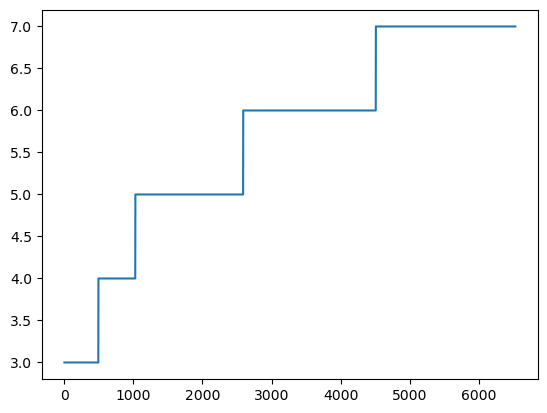

In [10]:
df['order'].plot()

##### 이 후 추가되는 데이터에 대해서는 아래 코드에서 수정해서 늘리면 됨

    temp{order} = df[df['order'] == order_list[{index}]]
    plt.plot(temp{order}.index, temp{order}[sensors[i]], color='~~')

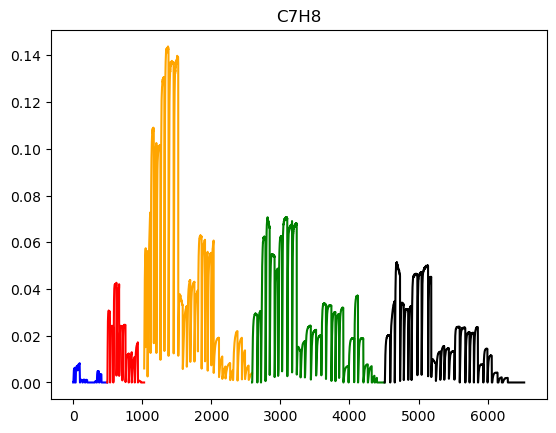

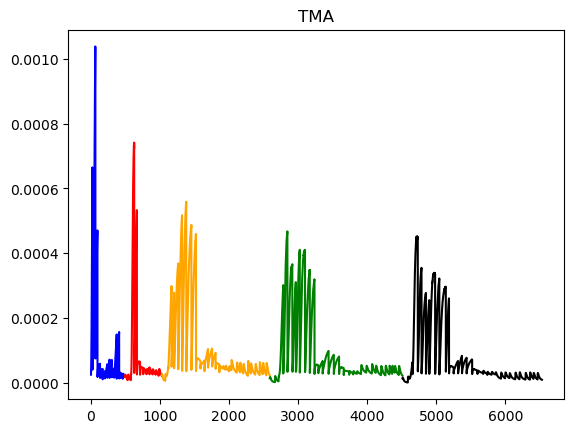

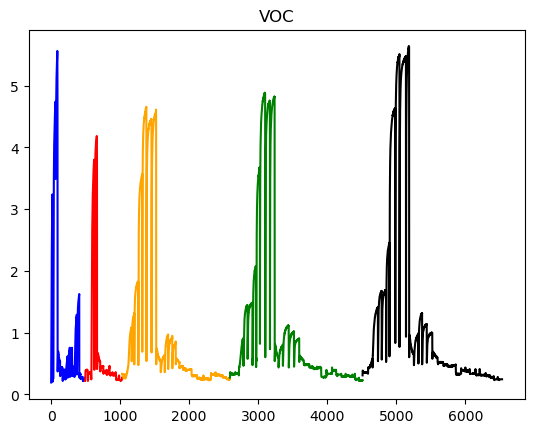

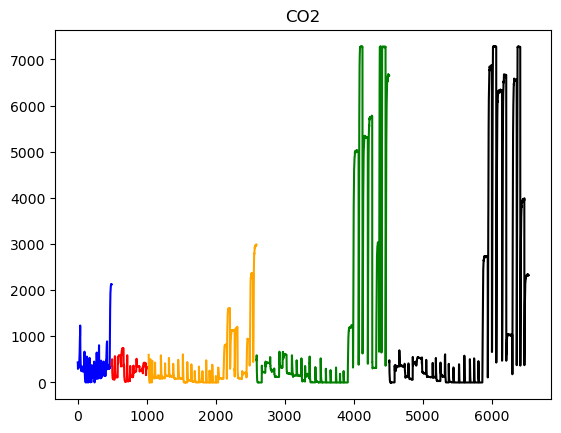

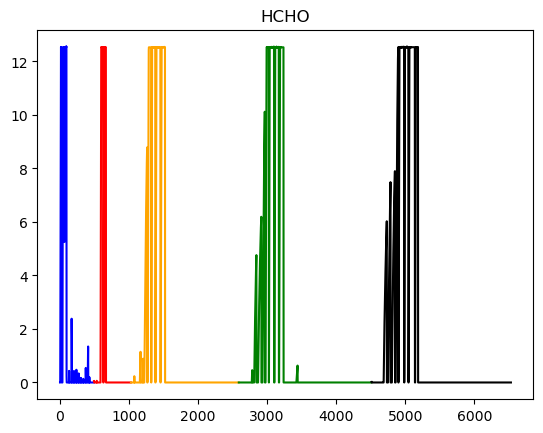

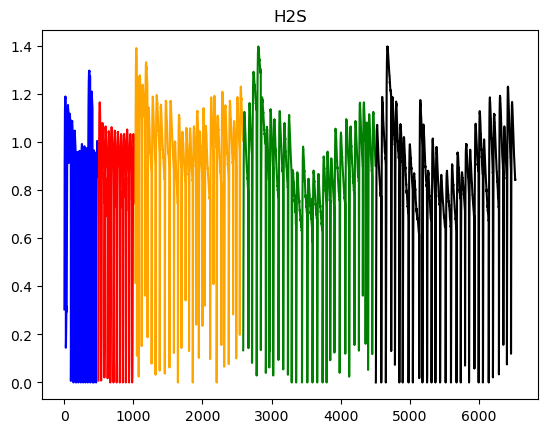

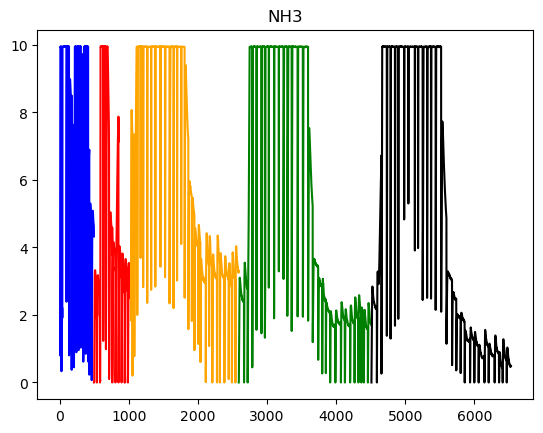

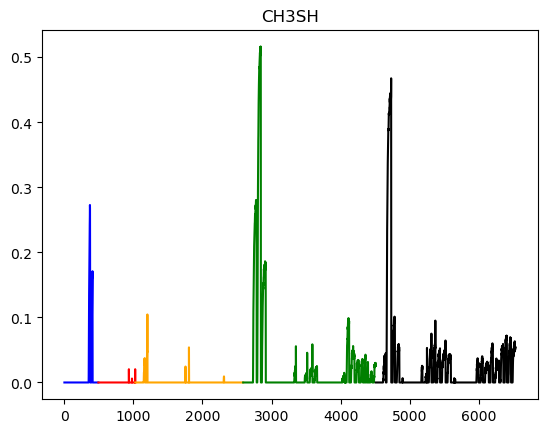

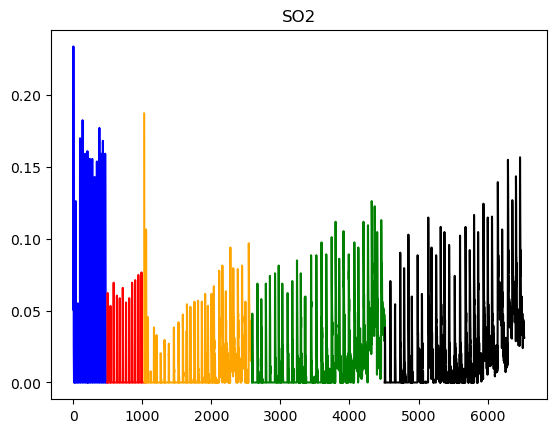

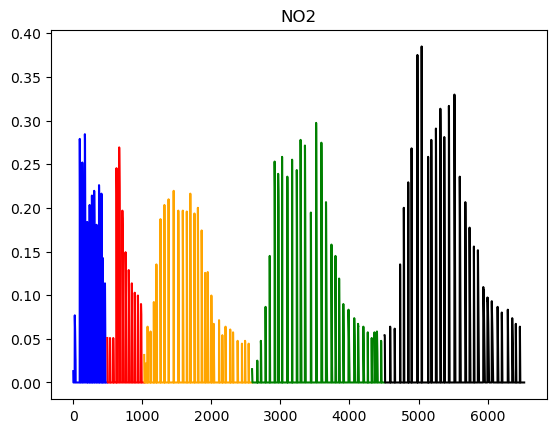

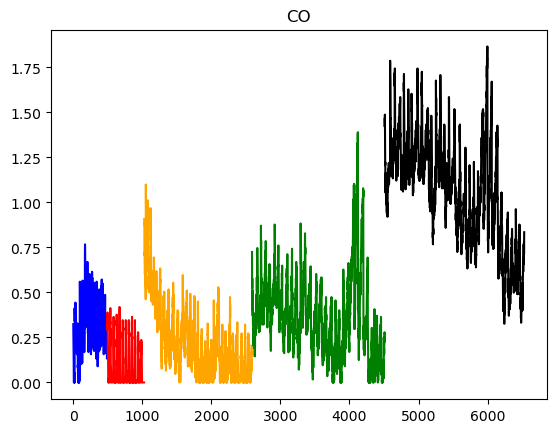

In [11]:
order_list = np.unique(df['order'])

for i in range(len(sensors)):
    temp3 = df[df['order'] == order_list[0]]
    plt.plot(temp3.index, temp3[sensors[i]], color='blue')

    temp4 = df[df['order'] == order_list[1]]
    plt.plot(temp4.index, temp4[sensors[i]], color='red')

    temp5 = df[df['order'] == order_list[2]]
    plt.plot(temp5.index, temp5[sensors[i]], color='orange')

    temp6 = df[df['order'] == order_list[3]]
    plt.plot(temp6.index, temp6[sensors[i]], color='green')

    temp7 = df[df['order'] == order_list[4]]
    plt.plot(temp7.index, temp7[sensors[i]], color='black')

    plt.title(sensors[i])
    
    plt.show()

# 전체 데이터셋에 대해 label 별 데이터 시각화

## t-SNE (2D)

In [12]:
df_t = df[[*sensors]]
df_t

,C7H8,TMA,VOC,CO2,HCHO,H2S,NH3,CH3SH,SO2,NO2,CO
0,0.000000,0.000026,0.192282,435.1554,0.00000,0.303789,0.809661,0.000000,0.050841,0.012979,0.323783
1,0.000000,0.000034,0.357748,431.6093,0.00000,0.528598,3.488177,0.000000,0.190711,0.000000,0.291240
2,0.000000,0.000045,0.498292,326.9812,0.00000,0.688187,9.506214,0.000000,0.233748,0.000000,0.230189
3,0.000944,0.000057,0.728273,295.0207,0.00000,0.815260,9.946881,0.000000,0.176365,0.000000,0.205769
4,0.002350,0.000073,1.036101,324.5227,0.79195,0.911156,9.946881,0.000000,0.130409,0.000000,0.150823
...,...,...,...,...,...,...,...,...,...,...,...
6526,0.000000,0.000010,0.244088,2325.8740,0.00000,0.854971,0.503477,0.055463,0.040081,0.000000,0.730805
6527,0.000000,0.000010,0.243422,2335.7020,0.00000,0.854971,0.495518,0.055463,0.032909,0.000000,0.779646
6528,0.000000,0.000010,0.244088,2325.8740,0.00000,0.843852,0.490212,0.052521,0.031115,0.000000,0.712490
6529,0.000000,0.000010,0.243422,2325.8740,0.00000,0.845440,0.492865,0.054874,0.031115,0.000000,0.779646


In [13]:
from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
le = LabelEncoder()
le.fit(df['label_type'])

# 인코딩한 데이터로 변환
le_encoded = le.transform(df['label_type'])

# 결과물을 확인하면 array 형태로 나옵니다.
# 아래는 라벨 인코딩으로 만들어낸 데이터를 데이터 프레임으로 만들어주는 코드입니다.
new_cat = pd.DataFrame(le_encoded, columns = ['result'])

# 아래 코드를 실행시키면 인코딩된 class를 확인할 수 있습니다.
print(le.classes_)

new_cat.value_counts()

['A' 'B' 'C' 'EN' 'ME' 'MO']


result
5         1166
1         1152
3         1087
0         1086
4         1037
2         1003
dtype: int64

Text(0, 0.5, 't-SNE feature 1')

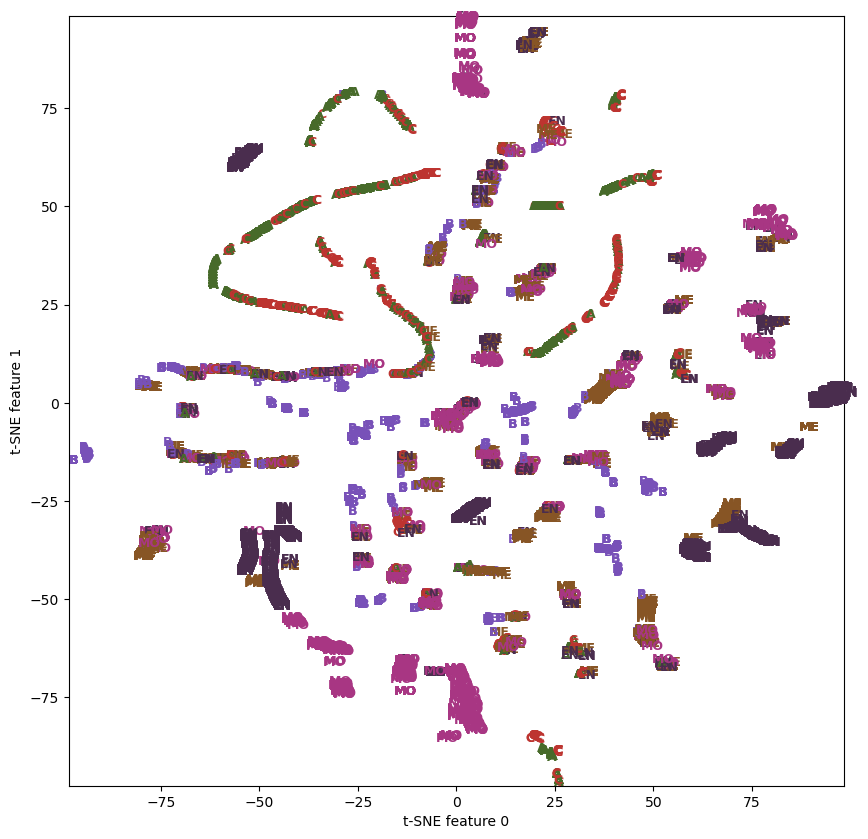

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_tsne = tsne.fit_transform(df_t)

plt.figure(figsize=(10,10))
plt.xlim(df_tsne[:,0].min(), df_tsne[:,0].max()+1)
plt.ylim(df_tsne[:,1].min(), df_tsne[:,1].max()+1)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683"]

for i in range(len(df_t)):
    plt.text(df_tsne[i,0], df_tsne[i,1], str(df['label_type'][i]),
             color = colors[new_cat["result"][i]],
             fontdict = {'weight':'bold','size':9})
    
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## t-SNE (3D)

<IPython.core.display.Javascript object>


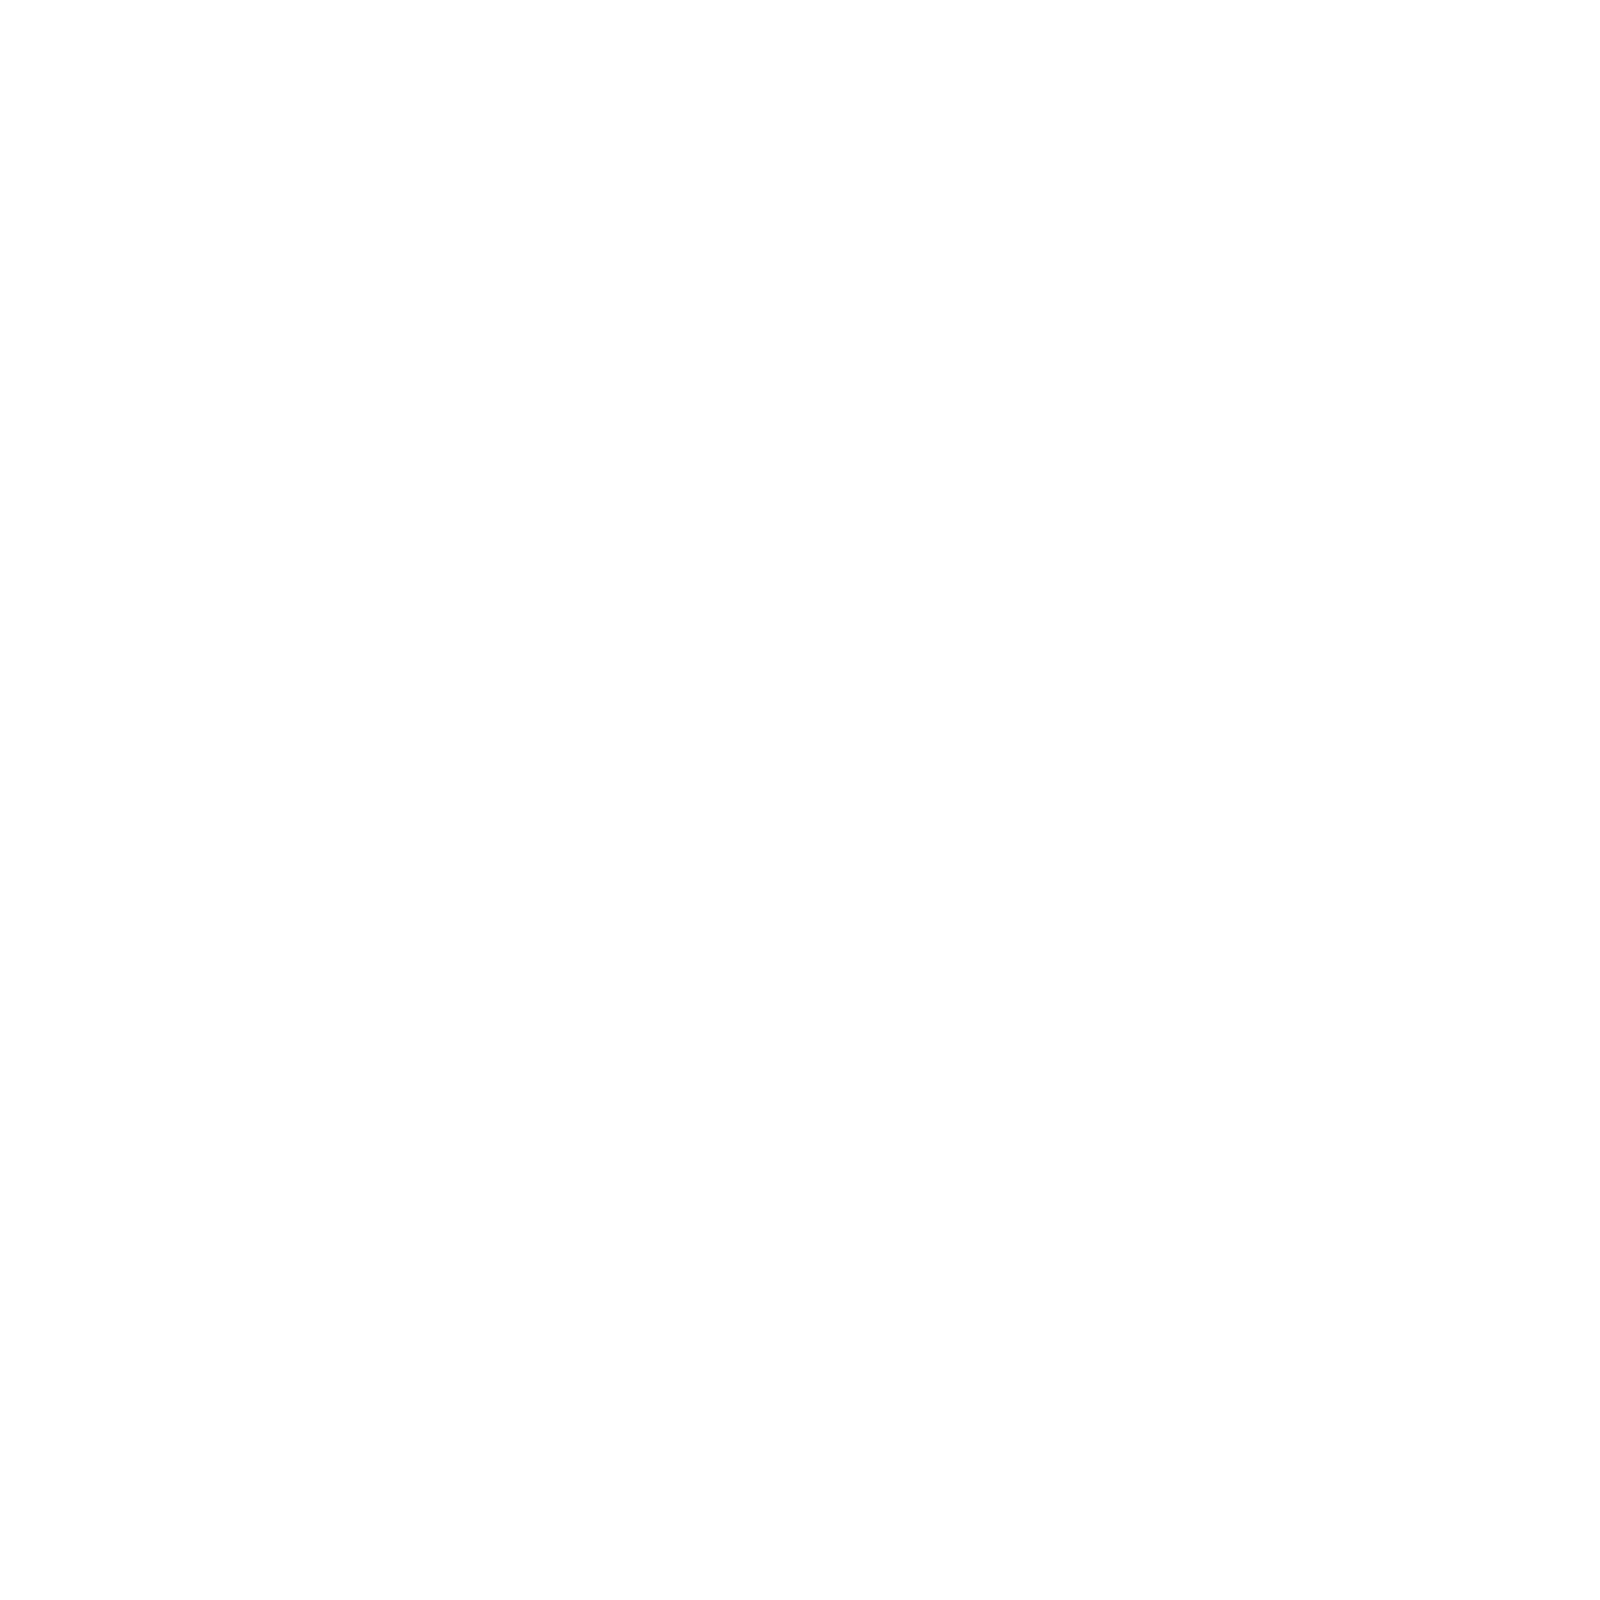

In [15]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

tsne3d = TSNE(n_components = 3, random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_tsne3d = tsne3d.fit_transform(df_t)

# numpy array -> DataFrame 변환
df_tsne3d = pd.DataFrame(df_tsne3d, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
df_tsne3d['type'] = df['label_type']

# target 별 분리
df_tsne3d_0 = df_tsne3d[df_tsne3d['type'] == "B"]
df_tsne3d_1 = df_tsne3d[df_tsne3d['type'] == "A"]
df_tsne3d_2 = df_tsne3d[df_tsne3d['type'] == "C"]
df_tsne3d_3 = df_tsne3d[df_tsne3d['type'] == "EN"]
df_tsne3d_4 = df_tsne3d[df_tsne3d['type'] == "ME"]
df_tsne3d_5 = df_tsne3d[df_tsne3d['type'] == "MO"]

# target 별 시각화
ax.scatter(df_tsne3d_0['component 0'], df_tsne3d_0['component 1'], df_tsne3d_0['component 2'], color = 'blue', label = 'B')
ax.scatter(df_tsne3d_1['component 0'], df_tsne3d_1['component 1'], df_tsne3d_1['component 2'], color = 'red', label = 'A')
ax.scatter(df_tsne3d_2['component 0'], df_tsne3d_2['component 1'], df_tsne3d_2['component 2'], color = 'green', label = 'C')
ax.scatter(df_tsne3d_3['component 0'], df_tsne3d_3['component 1'], df_tsne3d_3['component 2'], color = 'orange', label = 'EN')
ax.scatter(df_tsne3d_4['component 0'], df_tsne3d_4['component 1'], df_tsne3d_4['component 2'], color = 'black', label = 'ME')
ax.scatter(df_tsne3d_5['component 0'], df_tsne3d_5['component 1'], df_tsne3d_5['component 2'], color = 'purple', label = 'MO')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

In [16]:
label_type_list = pd.unique(df["label_type"])
label_type_list

array(['B', 'EN', 'MO', 'ME', 'A', 'C'], dtype=object)

In [17]:
for i in label_type_list:
    globals()['df_'+i] = df.loc[df['label_type']==i]
    globals()['df_'+i].sort_values(by="reg_date")
    globals()['df_'+i].reset_index(drop=True, inplace=True)

In [18]:
df_B['order'] = 0
for j in range(len(df_B)):
    for i in range(5):
        if split_date_list[i] < df_B['reg_date'][j] < split_date_list[i+1]:
            df_B['order'][j] = i+3
        else:
            pass

In [19]:
df_B

,reg_date,C7H8,TMA,VOC,CO2,HCHO,H2S,NH3,CH3SH,SO2,NO2,CO,안정화,label_type,order
0,2023-03-13 12:52:05,0.000000,0.000026,0.192282,435.1554,0.00000,0.303789,0.809661,0.000000,0.050841,0.012979,0.323783,0.0,B,3
1,2023-03-13 12:52:06,0.000000,0.000034,0.357748,431.6093,0.00000,0.528598,3.488177,0.000000,0.190711,0.000000,0.291240,0.0,B,3
2,2023-03-13 12:52:08,0.000000,0.000045,0.498292,326.9812,0.00000,0.688187,9.506214,0.000000,0.233748,0.000000,0.230189,0.0,B,3
3,2023-03-13 12:52:09,0.000944,0.000057,0.728273,295.0207,0.00000,0.815260,9.946881,0.000000,0.176365,0.000000,0.205769,1.0,B,3
4,2023-03-13 12:52:10,0.002350,0.000073,1.036101,324.5227,0.79195,0.911156,9.946881,0.000000,0.130409,0.000000,0.150823,1.0,B,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2023-03-29 09:32:08,0.045184,0.000250,5.625964,119.5839,12.53444,1.004282,9.939775,0.025689,0.018563,0.000000,1.158161,1.0,B,7
1148,2023-03-29 09:32:09,0.045184,0.000251,5.634535,110.6328,12.53444,0.996340,9.939775,0.019803,0.020356,0.000000,1.255842,1.0,B,7
1149,2023-03-29 09:32:11,0.045036,0.000255,5.625964,110.6328,12.53444,0.989986,9.942428,0.022746,0.025736,0.000000,1.219212,1.0,B,7
1150,2023-03-29 09:32:12,0.045184,0.000258,5.630175,120.4668,12.53444,0.987350,9.942428,0.025100,0.013183,0.000000,1.139846,1.0,B,7


In [20]:
df_B_t = df_B[[*sensors]]
df_B_t

,C7H8,TMA,VOC,CO2,HCHO,H2S,NH3,CH3SH,SO2,NO2,CO
0,0.000000,0.000026,0.192282,435.1554,0.00000,0.303789,0.809661,0.000000,0.050841,0.012979,0.323783
1,0.000000,0.000034,0.357748,431.6093,0.00000,0.528598,3.488177,0.000000,0.190711,0.000000,0.291240
2,0.000000,0.000045,0.498292,326.9812,0.00000,0.688187,9.506214,0.000000,0.233748,0.000000,0.230189
3,0.000944,0.000057,0.728273,295.0207,0.00000,0.815260,9.946881,0.000000,0.176365,0.000000,0.205769
4,0.002350,0.000073,1.036101,324.5227,0.79195,0.911156,9.946881,0.000000,0.130409,0.000000,0.150823
...,...,...,...,...,...,...,...,...,...,...,...
1147,0.045184,0.000250,5.625964,119.5839,12.53444,1.004282,9.939775,0.025689,0.018563,0.000000,1.158161
1148,0.045184,0.000251,5.634535,110.6328,12.53444,0.996340,9.939775,0.019803,0.020356,0.000000,1.255842
1149,0.045036,0.000255,5.625964,110.6328,12.53444,0.989986,9.942428,0.022746,0.025736,0.000000,1.219212
1150,0.045184,0.000258,5.630175,120.4668,12.53444,0.987350,9.942428,0.025100,0.013183,0.000000,1.139846


<IPython.core.display.Javascript object>


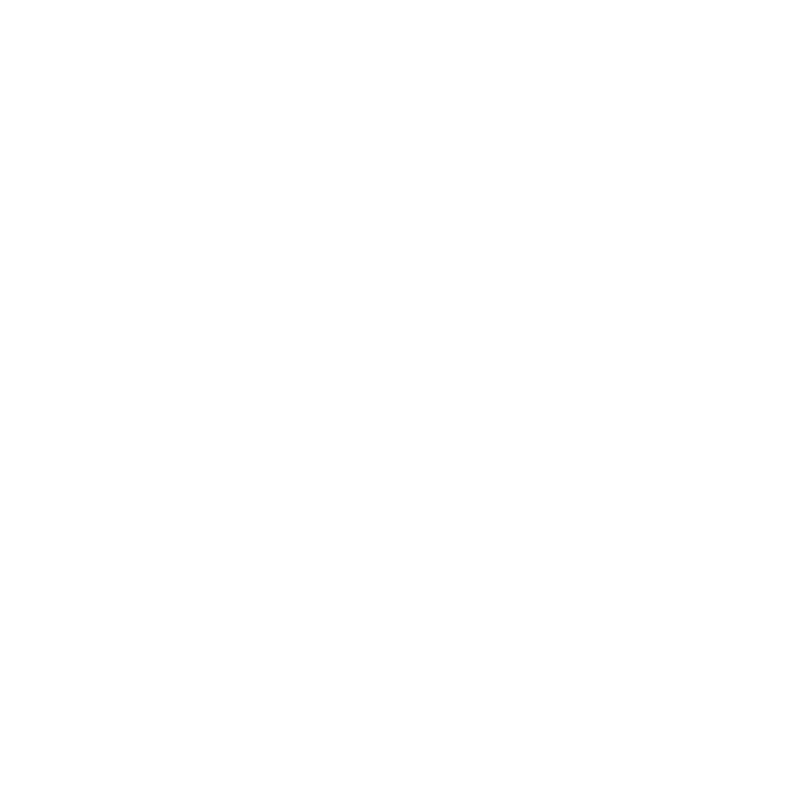

Text(0.5, 1.0, 'label B')

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_B_tsne = tsne.fit_transform(df_B_t)

plt.figure(figsize=(10,10))
plt.xlim(df_B_tsne[:,0].min(), df_B_tsne[:,0].max()+1)
plt.ylim(df_B_tsne[:,1].min(), df_B_tsne[:,1].max()+1)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525"]

for i in range(len(df_B_t)):
    plt.text(df_B_tsne[i,0], df_B_tsne[i,1], str(df_B['order'][i]),
             color = colors[df_B["order"][i]-3],
             fontdict = {'weight':'bold','size':9})
    
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

plt.title("label B")

<IPython.core.display.Javascript object>


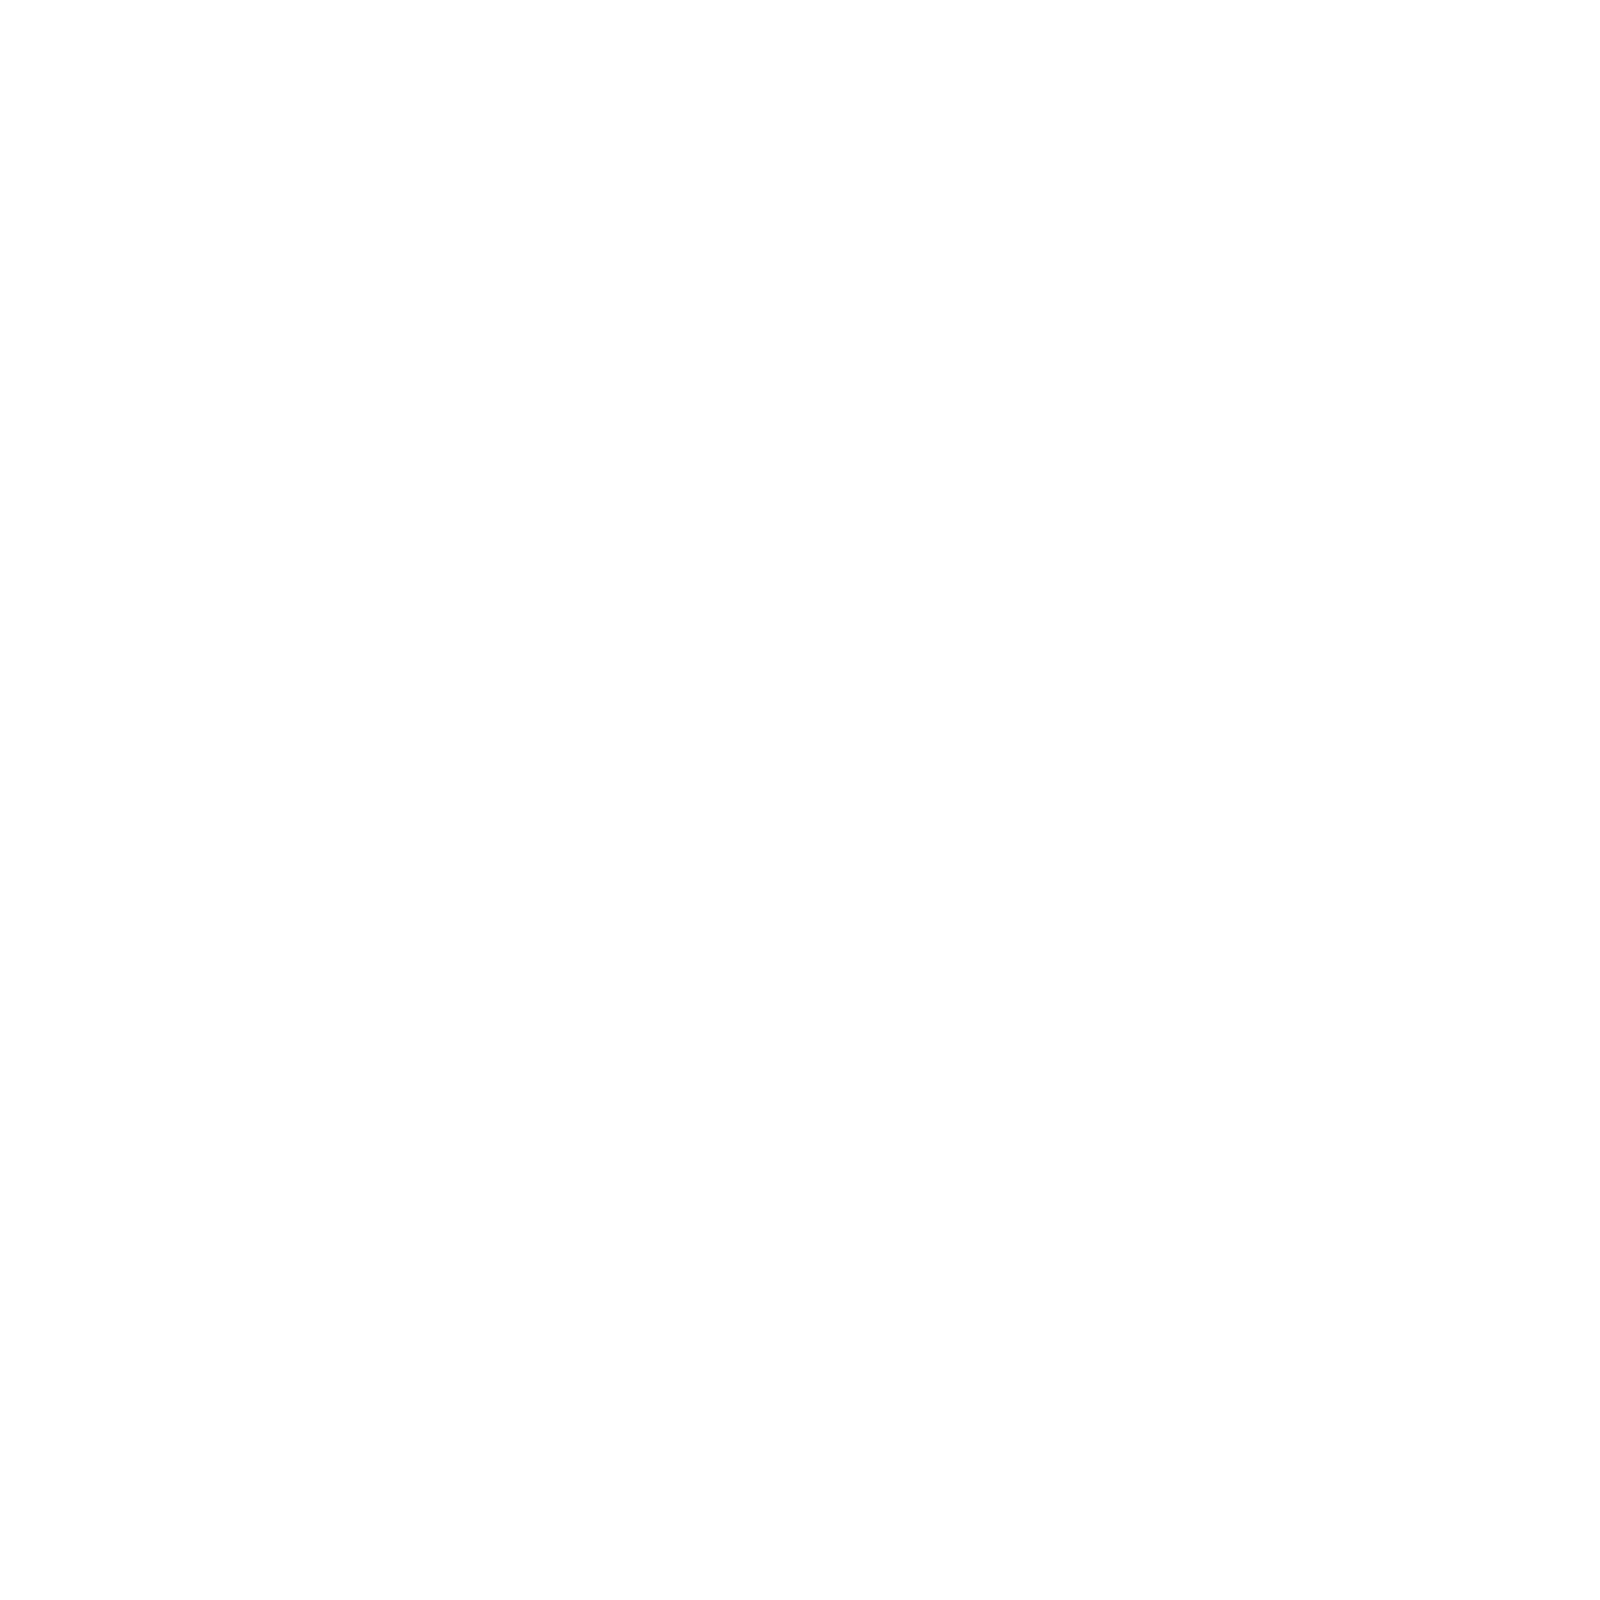

In [22]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

tsne3d = TSNE(n_components = 3, random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_B_tsne3d = tsne3d.fit_transform(df_B_t)

# numpy array -> DataFrame 변환
df_B_tsne3d = pd.DataFrame(df_B_tsne3d, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
df_B_tsne3d['order'] = df_B['order']

# target 별 분리
df_tsne3d_0 = df_B_tsne3d[df_B_tsne3d['order'] == 3]
df_tsne3d_1 = df_B_tsne3d[df_B_tsne3d['order'] == 4]
df_tsne3d_2 = df_B_tsne3d[df_B_tsne3d['order'] == 5]
df_tsne3d_3 = df_B_tsne3d[df_B_tsne3d['order'] == 6]
df_tsne3d_4 = df_B_tsne3d[df_B_tsne3d['order'] == 7]       #  <- 새 데이터셋 들어오면 추가하기

# target 별 시각화
ax.scatter(df_tsne3d_0['component 0'], df_tsne3d_0['component 1'], df_tsne3d_0['component 2'], color = 'blue', label = '3')
ax.scatter(df_tsne3d_1['component 0'], df_tsne3d_1['component 1'], df_tsne3d_1['component 2'], color = 'red', label = '4')
ax.scatter(df_tsne3d_2['component 0'], df_tsne3d_2['component 1'], df_tsne3d_2['component 2'], color = 'green', label = '5')
ax.scatter(df_tsne3d_3['component 0'], df_tsne3d_3['component 1'], df_tsne3d_3['component 2'], color = 'orange', label = '6')
ax.scatter(df_tsne3d_4['component 0'], df_tsne3d_4['component 1'], df_tsne3d_4['component 2'], color = 'black', label = '7')       #  <- 새 데이터셋 들어오면 추가하기

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()

plt.title("label B")
plt.show()

<IPython.core.display.Javascript object>


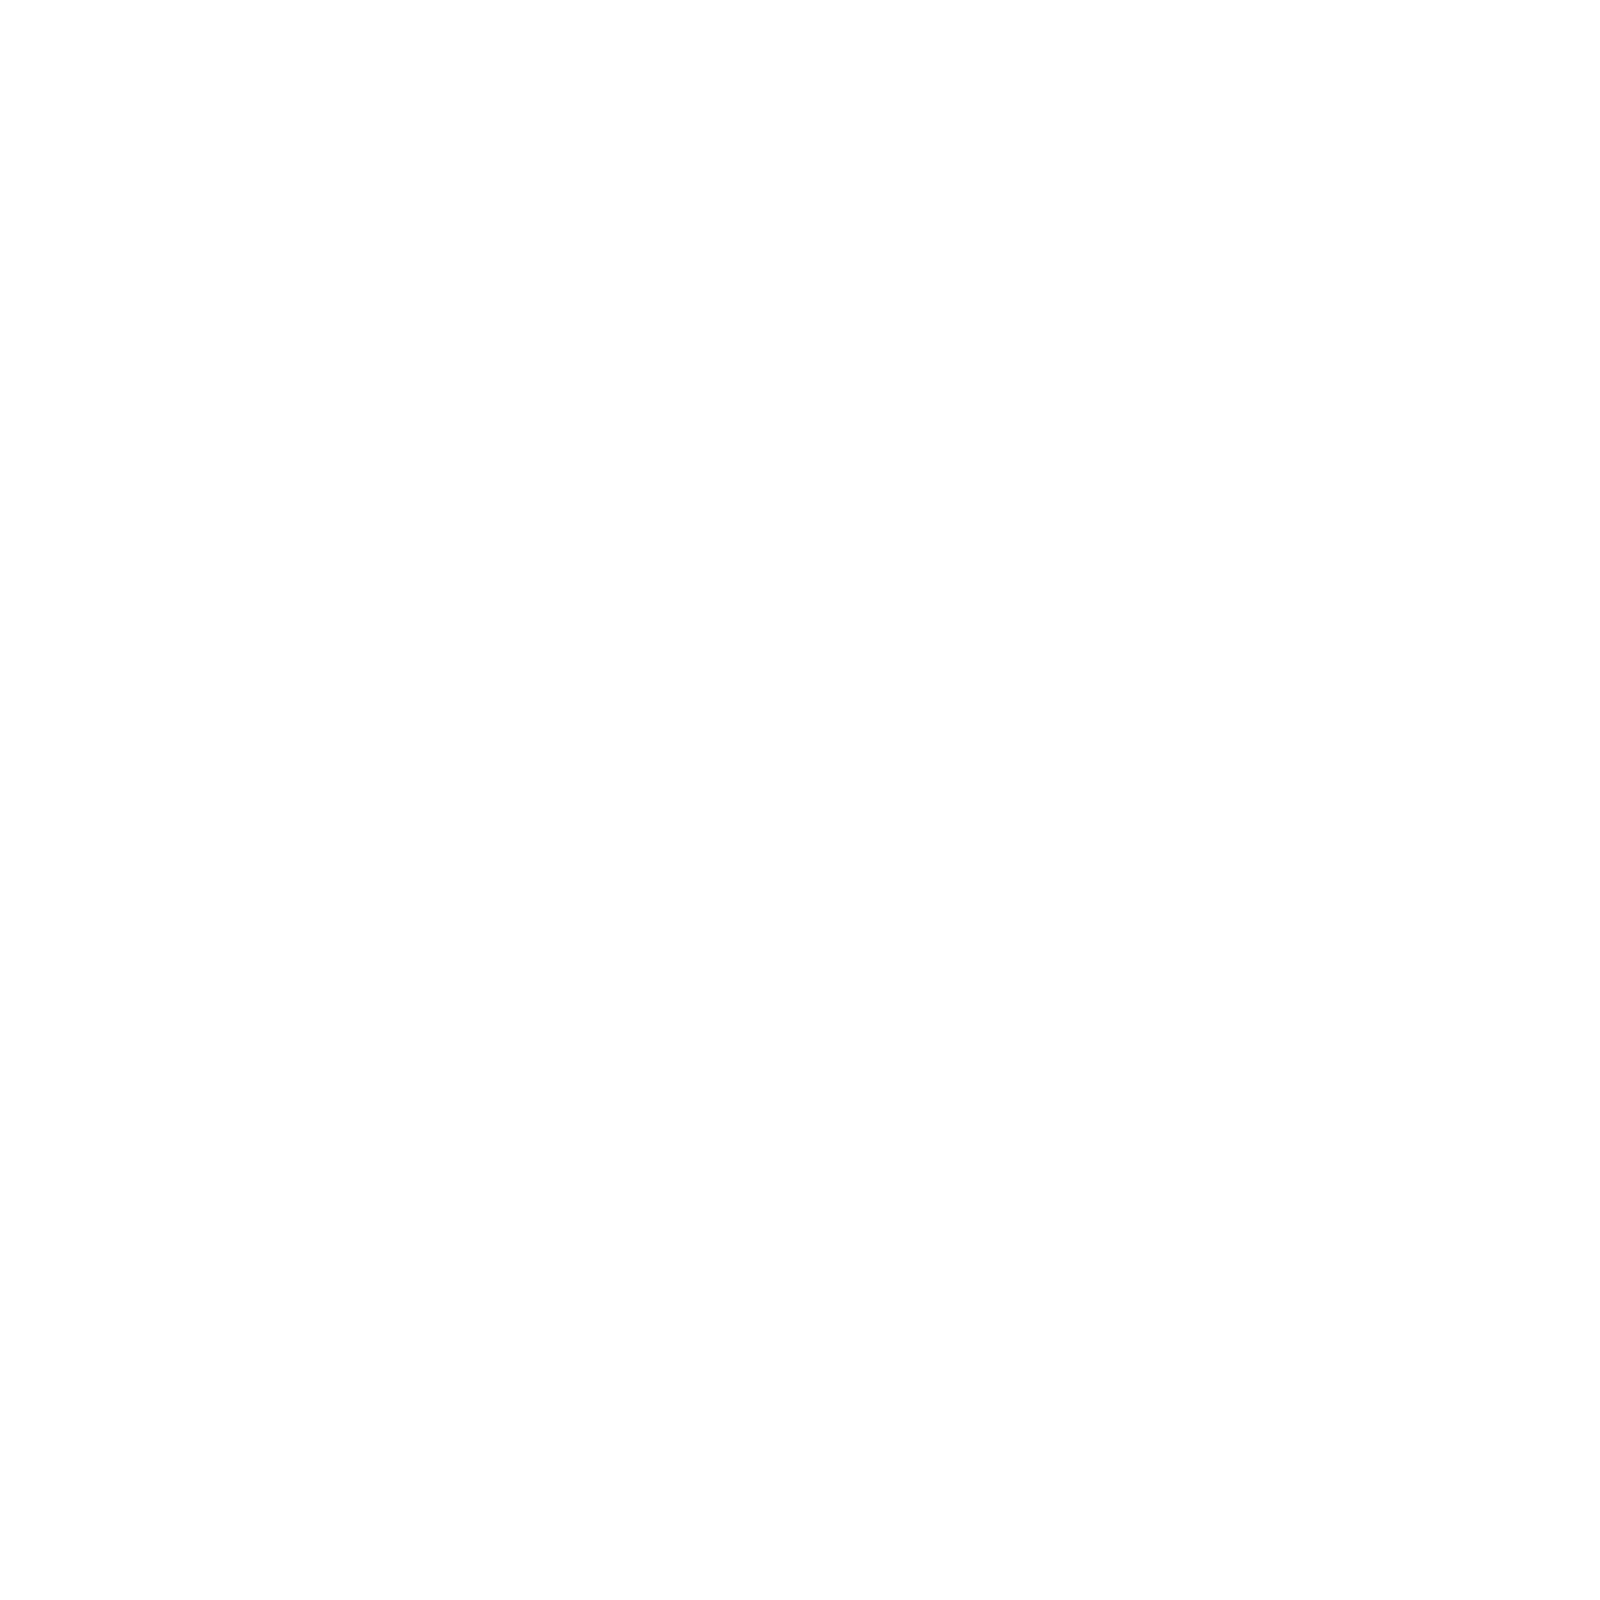

In [23]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

tsne3d = TSNE(n_components = 3, random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_EN_tsne3d = tsne3d.fit_transform(df_B_t)

# numpy array -> DataFrame 변환
df_EN_tsne3d = pd.DataFrame(df_EN_tsne3d, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
df_EN_tsne3d['order'] = df_B['order']

# target 별 분리
df_tsne3d_0 = df_EN_tsne3d[df_EN_tsne3d['order'] == 3]
df_tsne3d_1 = df_EN_tsne3d[df_EN_tsne3d['order'] == 4]
df_tsne3d_2 = df_EN_tsne3d[df_EN_tsne3d['order'] == 5]
df_tsne3d_3 = df_EN_tsne3d[df_EN_tsne3d['order'] == 6]
df_tsne3d_4 = df_EN_tsne3d[df_EN_tsne3d['order'] == 7]       #  <- 새 데이터셋 들어오면 추가하기

# target 별 시각화
ax.scatter(df_tsne3d_0['component 0'], df_tsne3d_0['component 1'], df_tsne3d_0['component 2'], color = 'blue', label = '3')
ax.scatter(df_tsne3d_1['component 0'], df_tsne3d_1['component 1'], df_tsne3d_1['component 2'], color = 'red', label = '4')
ax.scatter(df_tsne3d_2['component 0'], df_tsne3d_2['component 1'], df_tsne3d_2['component 2'], color = 'green', label = '5')
ax.scatter(df_tsne3d_3['component 0'], df_tsne3d_3['component 1'], df_tsne3d_3['component 2'], color = 'orange', label = '6')
ax.scatter(df_tsne3d_4['component 0'], df_tsne3d_4['component 1'], df_tsne3d_4['component 2'], color = 'black', label = '7')       #  <- 새 데이터셋 들어오면 추가하기

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()

plt.title("label EN")
plt.show()

<IPython.core.display.Javascript object>


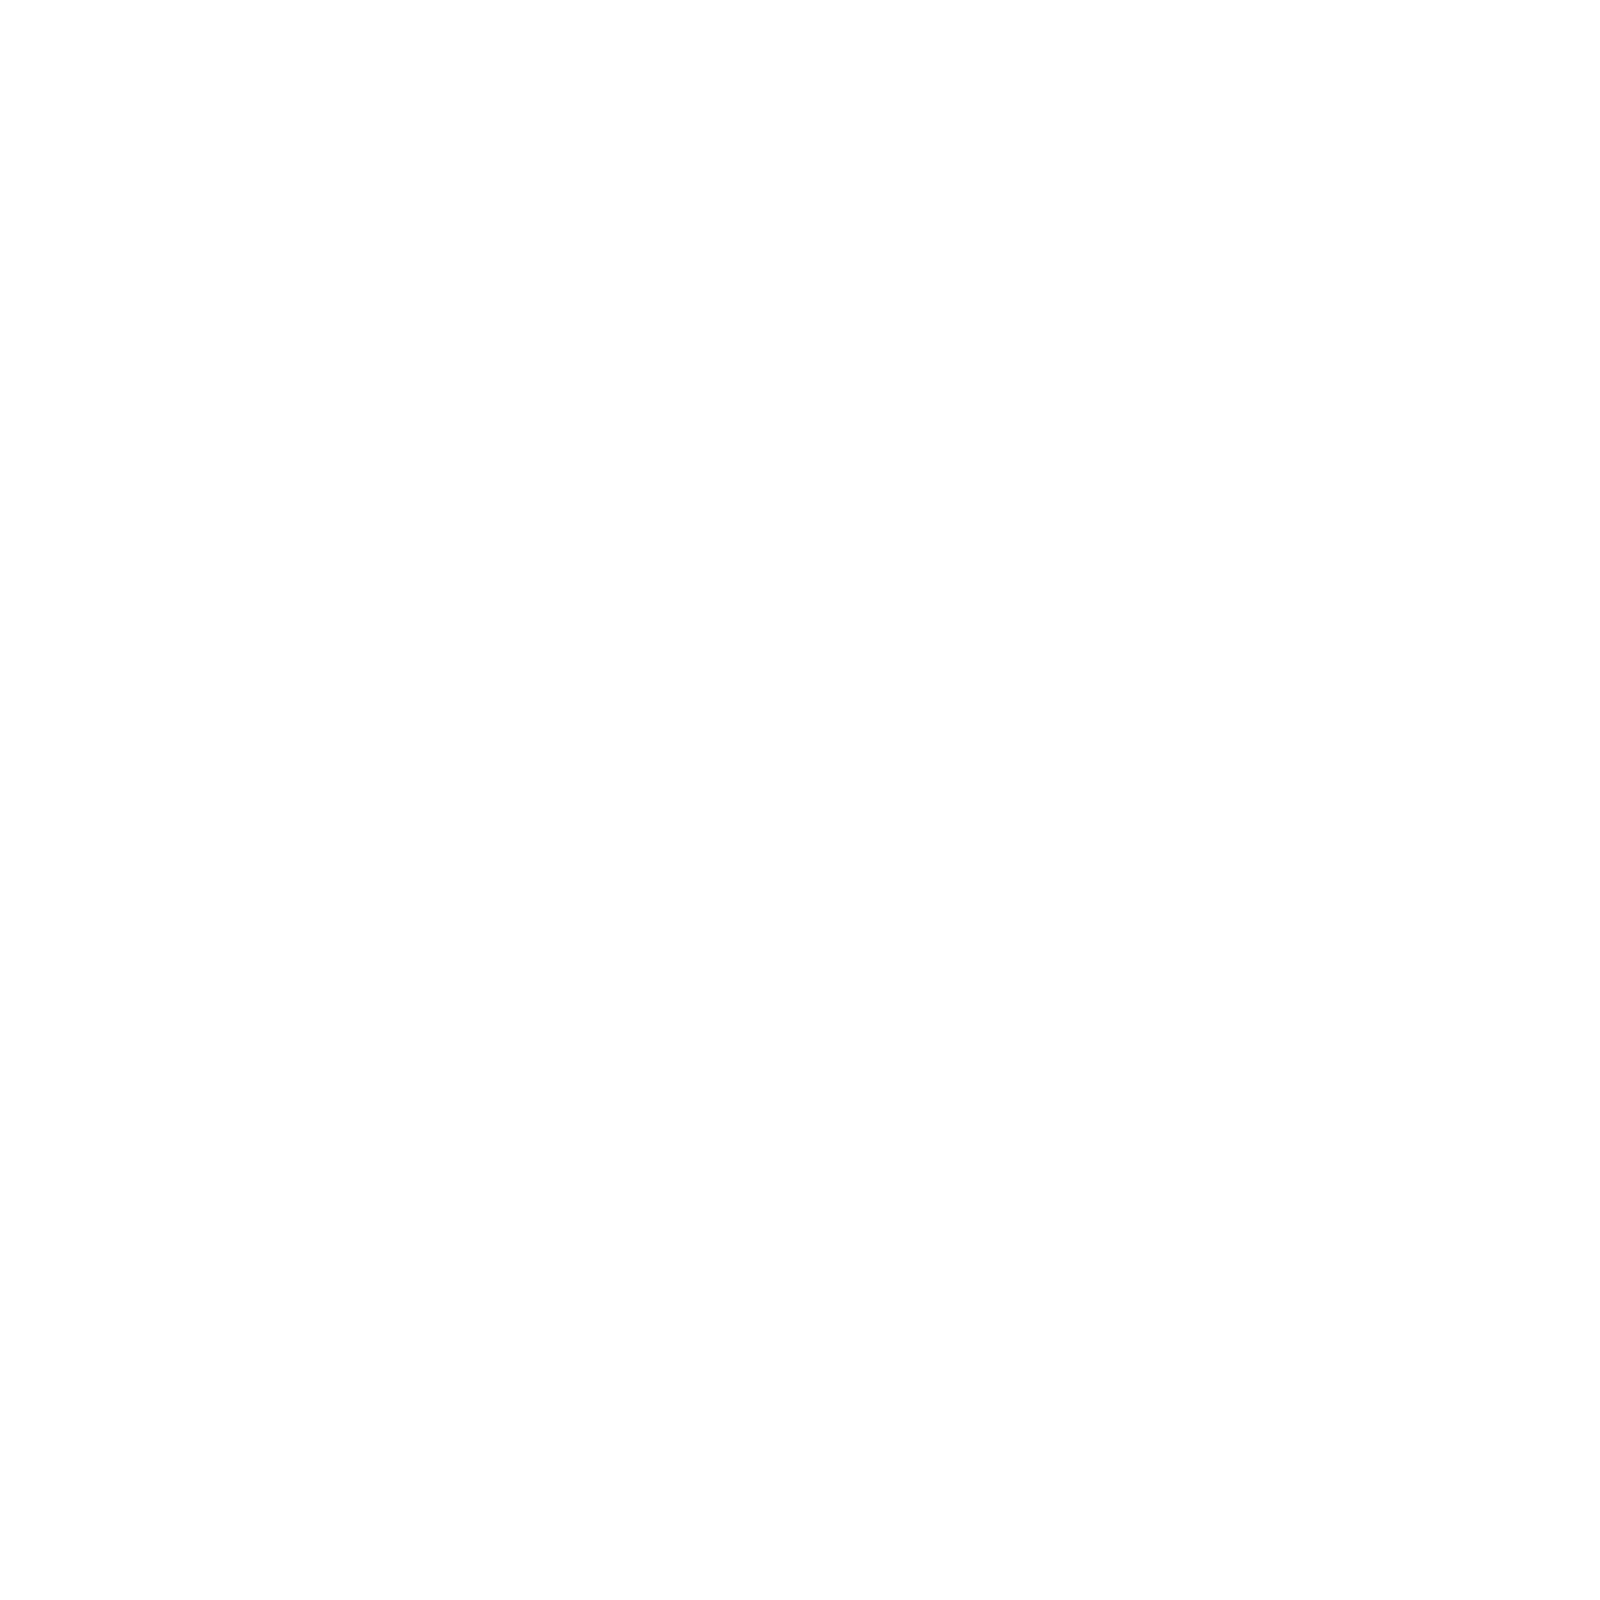

In [24]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

tsne3d = TSNE(n_components = 3, random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_MO_tsne3d = tsne3d.fit_transform(df_B_t)

# numpy array -> DataFrame 변환
df_MO_tsne3d = pd.DataFrame(df_MO_tsne3d, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
df_MO_tsne3d['order'] = df_B['order']

# target 별 분리
df_tsne3d_0 = df_MO_tsne3d[df_MO_tsne3d['order'] == 3]
df_tsne3d_1 = df_MO_tsne3d[df_MO_tsne3d['order'] == 4]
df_tsne3d_2 = df_MO_tsne3d[df_MO_tsne3d['order'] == 5]
df_tsne3d_3 = df_MO_tsne3d[df_MO_tsne3d['order'] == 6]
df_tsne3d_4 = df_MO_tsne3d[df_MO_tsne3d['order'] == 7]       #  <- 새 데이터셋 들어오면 추가하기

# target 별 시각화
ax.scatter(df_tsne3d_0['component 0'], df_tsne3d_0['component 1'], df_tsne3d_0['component 2'], color = 'blue', label = '3')
ax.scatter(df_tsne3d_1['component 0'], df_tsne3d_1['component 1'], df_tsne3d_1['component 2'], color = 'red', label = '4')
ax.scatter(df_tsne3d_2['component 0'], df_tsne3d_2['component 1'], df_tsne3d_2['component 2'], color = 'green', label = '5')
ax.scatter(df_tsne3d_3['component 0'], df_tsne3d_3['component 1'], df_tsne3d_3['component 2'], color = 'orange', label = '6')
ax.scatter(df_tsne3d_4['component 0'], df_tsne3d_4['component 1'], df_tsne3d_4['component 2'], color = 'black', label = '7')       #  <- 새 데이터셋 들어오면 추가하기

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()

plt.title("label MO")
plt.show()

<IPython.core.display.Javascript object>


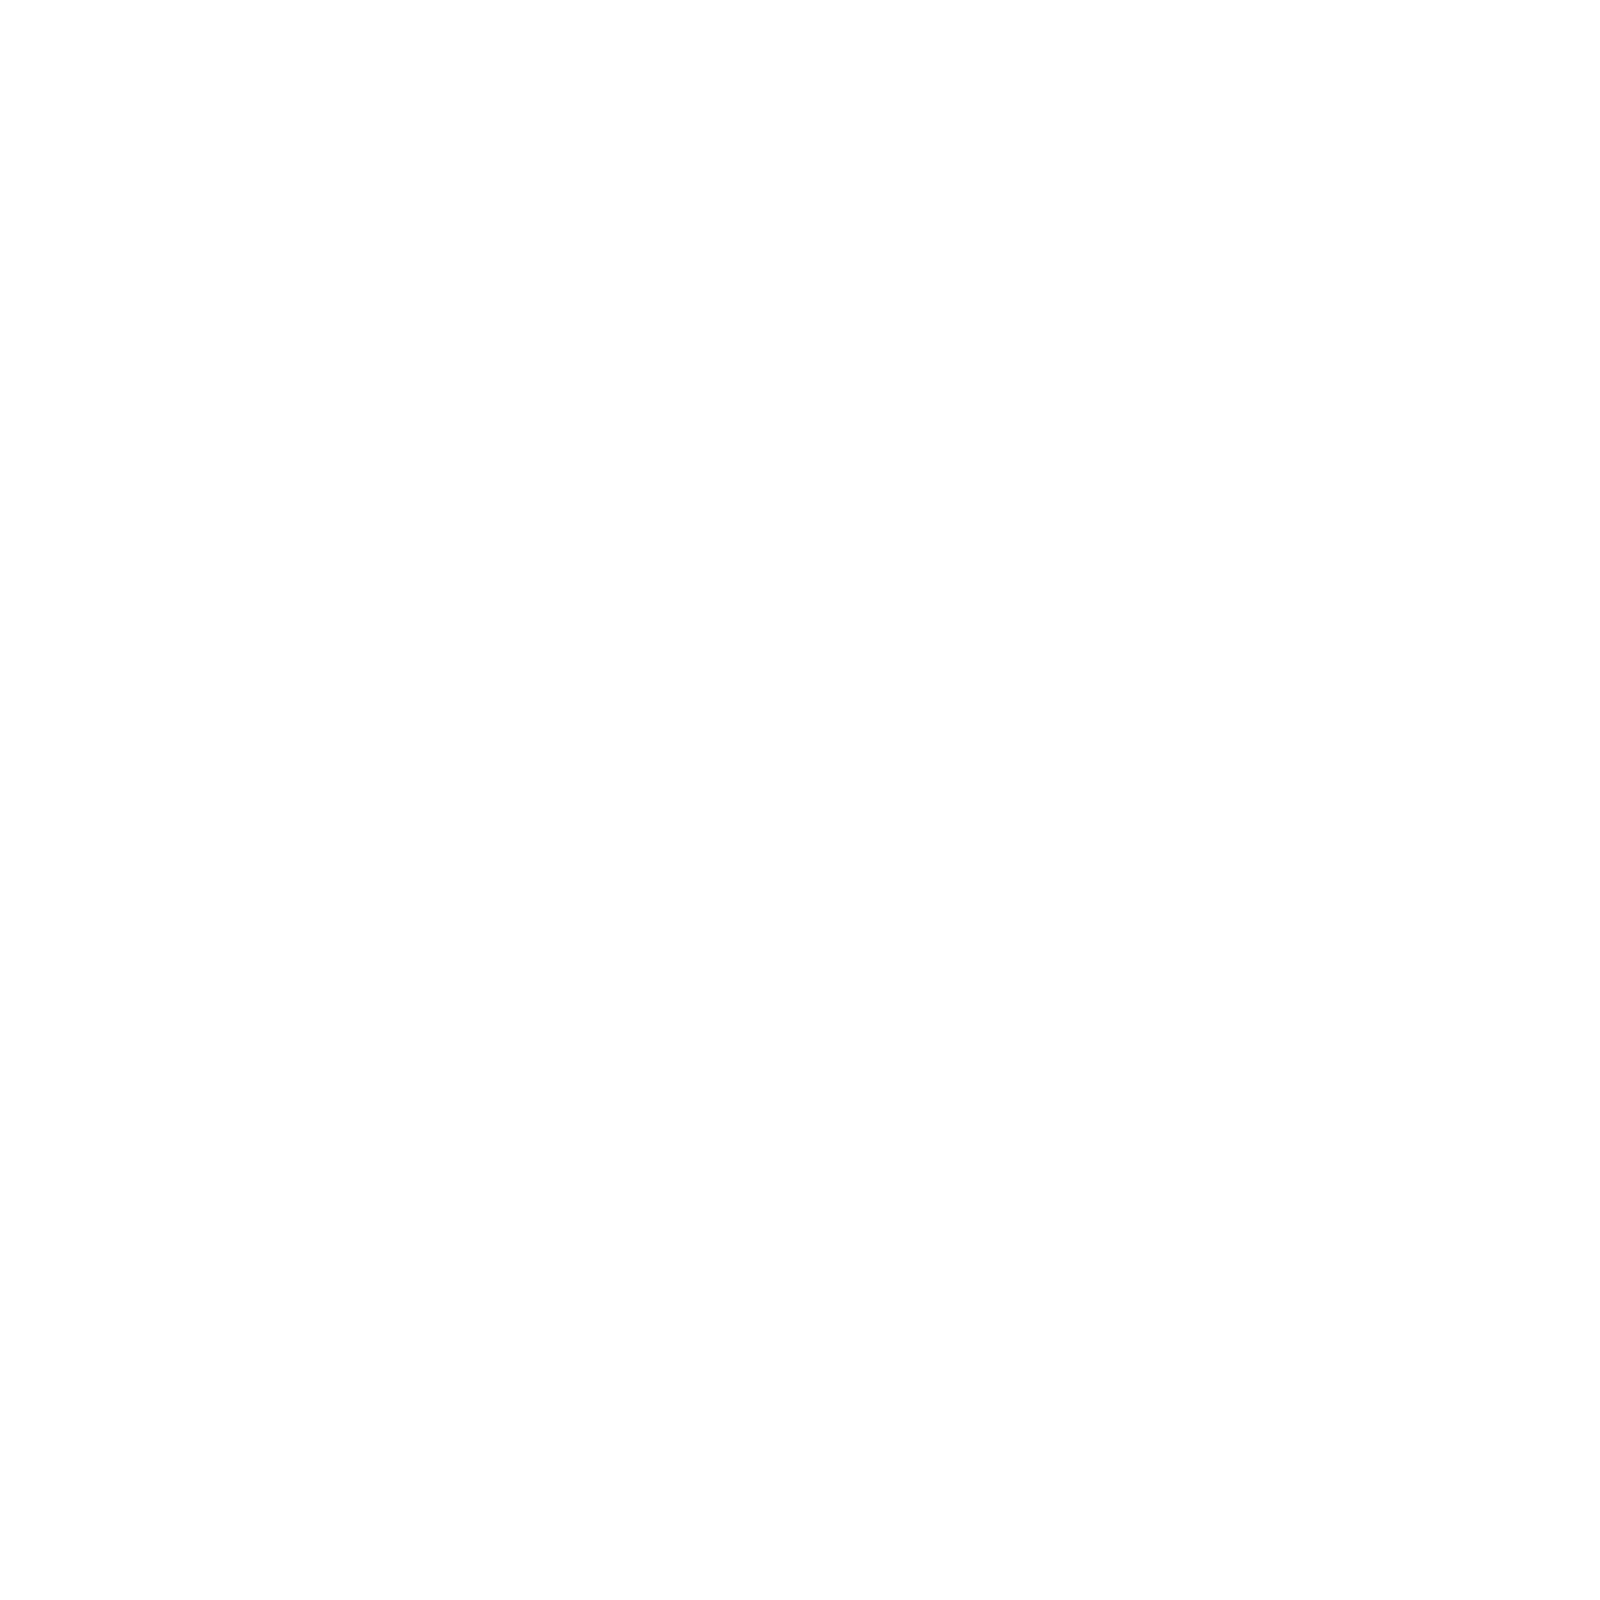

In [25]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

tsne3d = TSNE(n_components = 3, random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_ME_tsne3d = tsne3d.fit_transform(df_B_t)

# numpy array -> DataFrame 변환
df_ME_tsne3d = pd.DataFrame(df_ME_tsne3d, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
df_ME_tsne3d['order'] = df_B['order']

# target 별 분리
df_tsne3d_0 = df_ME_tsne3d[df_ME_tsne3d['order'] == 3]
df_tsne3d_1 = df_ME_tsne3d[df_ME_tsne3d['order'] == 4]
df_tsne3d_2 = df_ME_tsne3d[df_ME_tsne3d['order'] == 5]
df_tsne3d_3 = df_ME_tsne3d[df_ME_tsne3d['order'] == 6]
df_tsne3d_4 = df_ME_tsne3d[df_ME_tsne3d['order'] == 7]       #  <- 새 데이터셋 들어오면 추가하기

# target 별 시각화
ax.scatter(df_tsne3d_0['component 0'], df_tsne3d_0['component 1'], df_tsne3d_0['component 2'], color = 'blue', label = '3')
ax.scatter(df_tsne3d_1['component 0'], df_tsne3d_1['component 1'], df_tsne3d_1['component 2'], color = 'red', label = '4')
ax.scatter(df_tsne3d_2['component 0'], df_tsne3d_2['component 1'], df_tsne3d_2['component 2'], color = 'green', label = '5')
ax.scatter(df_tsne3d_3['component 0'], df_tsne3d_3['component 1'], df_tsne3d_3['component 2'], color = 'orange', label = '6')
ax.scatter(df_tsne3d_4['component 0'], df_tsne3d_4['component 1'], df_tsne3d_4['component 2'], color = 'black', label = '7')       #  <- 새 데이터셋 들어오면 추가하기

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()

plt.title("label ME")
plt.show()

<IPython.core.display.Javascript object>


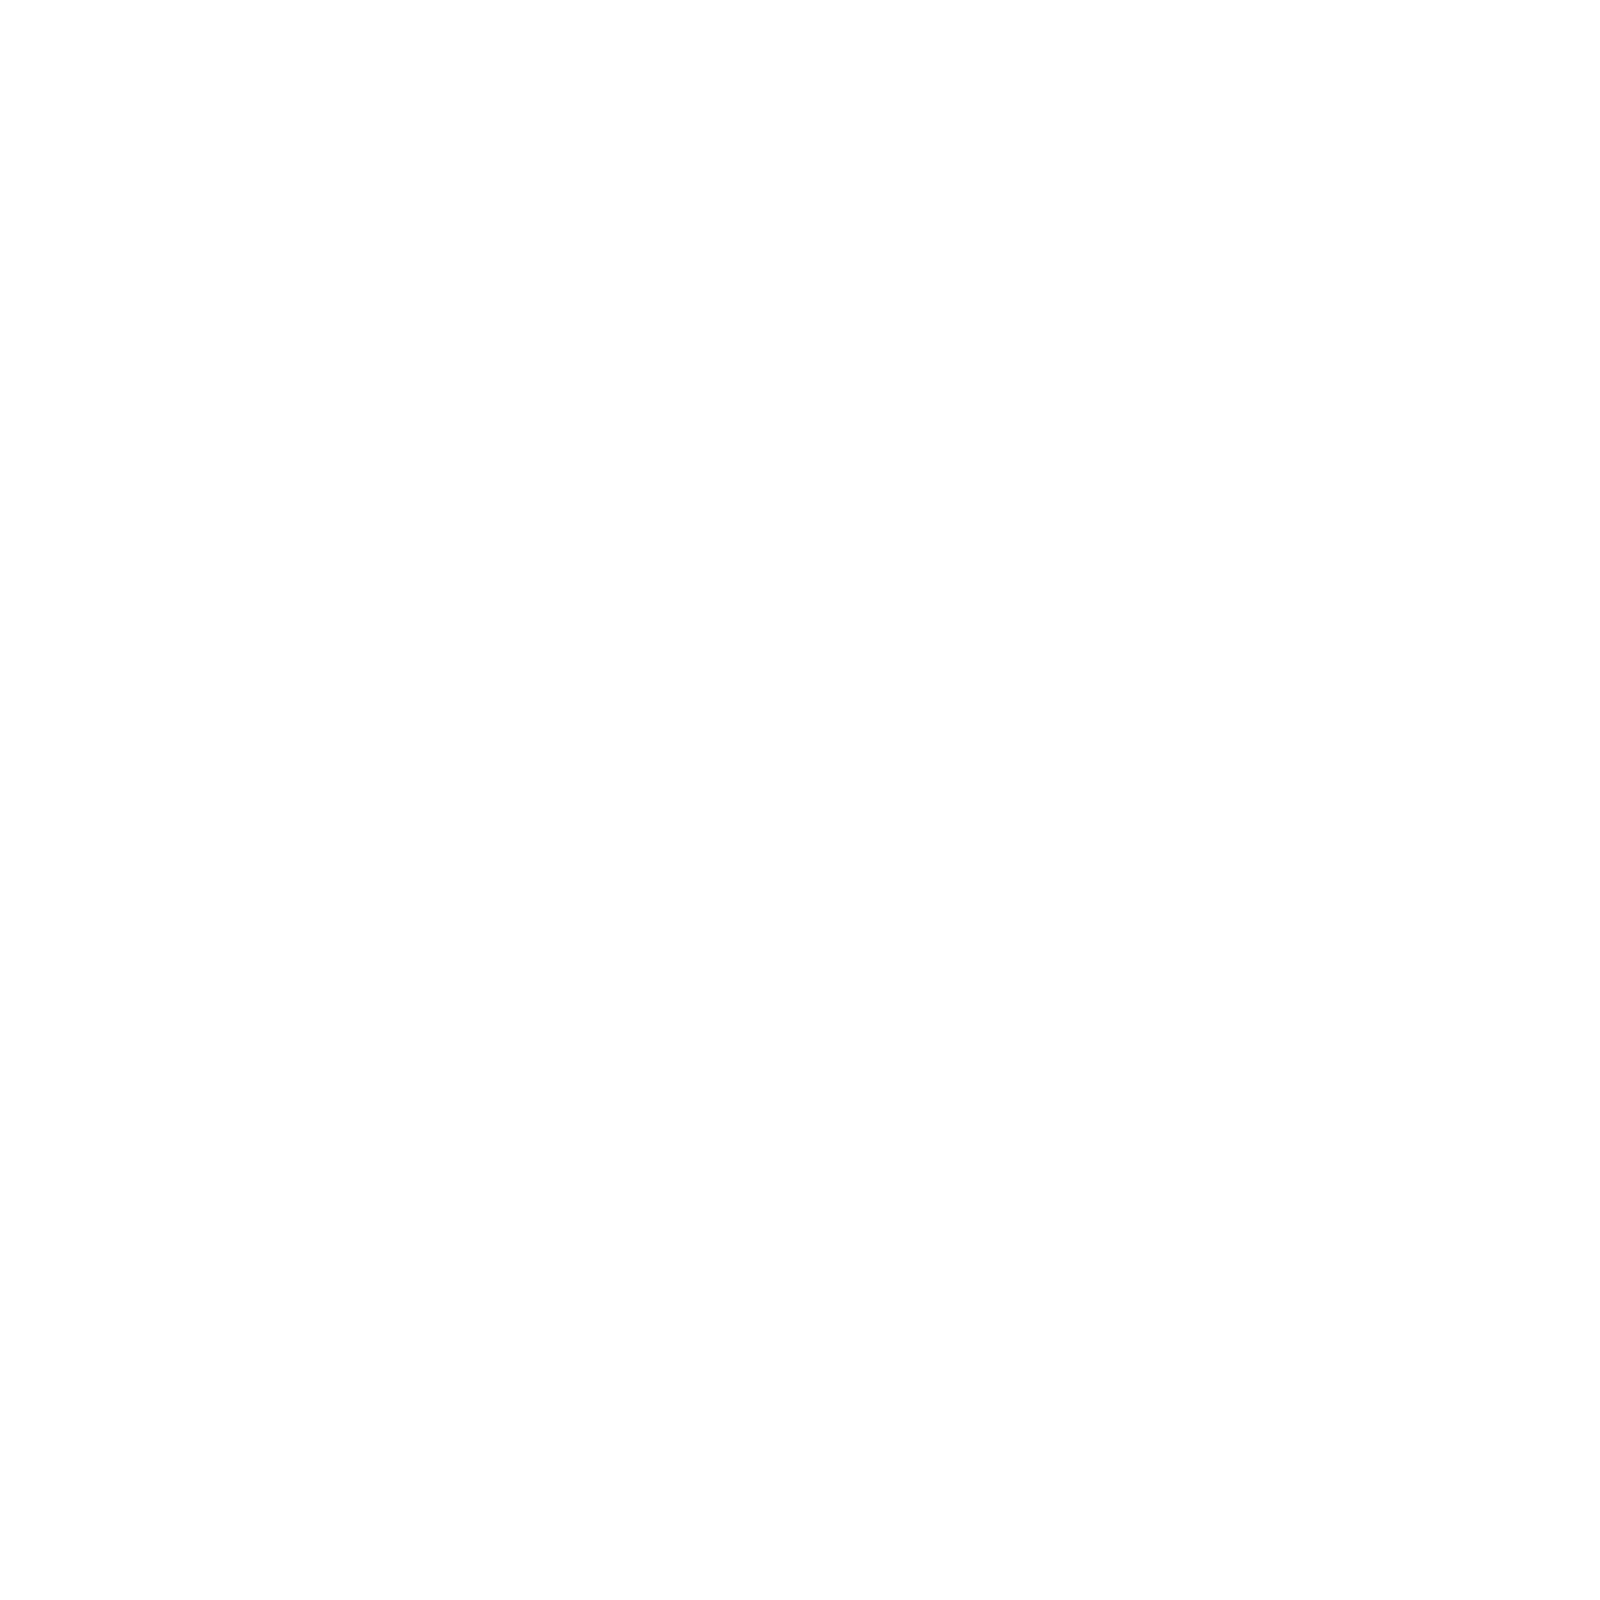

In [26]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

tsne3d = TSNE(n_components = 3, random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_A_tsne3d = tsne3d.fit_transform(df_B_t)

# numpy array -> DataFrame 변환
df_A_tsne3d = pd.DataFrame(df_A_tsne3d, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
df_A_tsne3d['order'] = df_B['order']

# target 별 분리
df_tsne3d_0 = df_A_tsne3d[df_A_tsne3d['order'] == 3]
df_tsne3d_1 = df_A_tsne3d[df_A_tsne3d['order'] == 4]
df_tsne3d_2 = df_A_tsne3d[df_A_tsne3d['order'] == 5]
df_tsne3d_3 = df_A_tsne3d[df_A_tsne3d['order'] == 6]
df_tsne3d_4 = df_A_tsne3d[df_A_tsne3d['order'] == 7]       #  <- 새 데이터셋 들어오면 추가하기

# target 별 시각화
ax.scatter(df_tsne3d_0['component 0'], df_tsne3d_0['component 1'], df_tsne3d_0['component 2'], color = 'blue', label = '3')
ax.scatter(df_tsne3d_1['component 0'], df_tsne3d_1['component 1'], df_tsne3d_1['component 2'], color = 'red', label = '4')
ax.scatter(df_tsne3d_2['component 0'], df_tsne3d_2['component 1'], df_tsne3d_2['component 2'], color = 'green', label = '5')
ax.scatter(df_tsne3d_3['component 0'], df_tsne3d_3['component 1'], df_tsne3d_3['component 2'], color = 'orange', label = '6')
ax.scatter(df_tsne3d_4['component 0'], df_tsne3d_4['component 1'], df_tsne3d_4['component 2'], color = 'black', label = '7')       #  <- 새 데이터셋 들어오면 추가하기

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()

plt.title("label A")
plt.show()

<IPython.core.display.Javascript object>


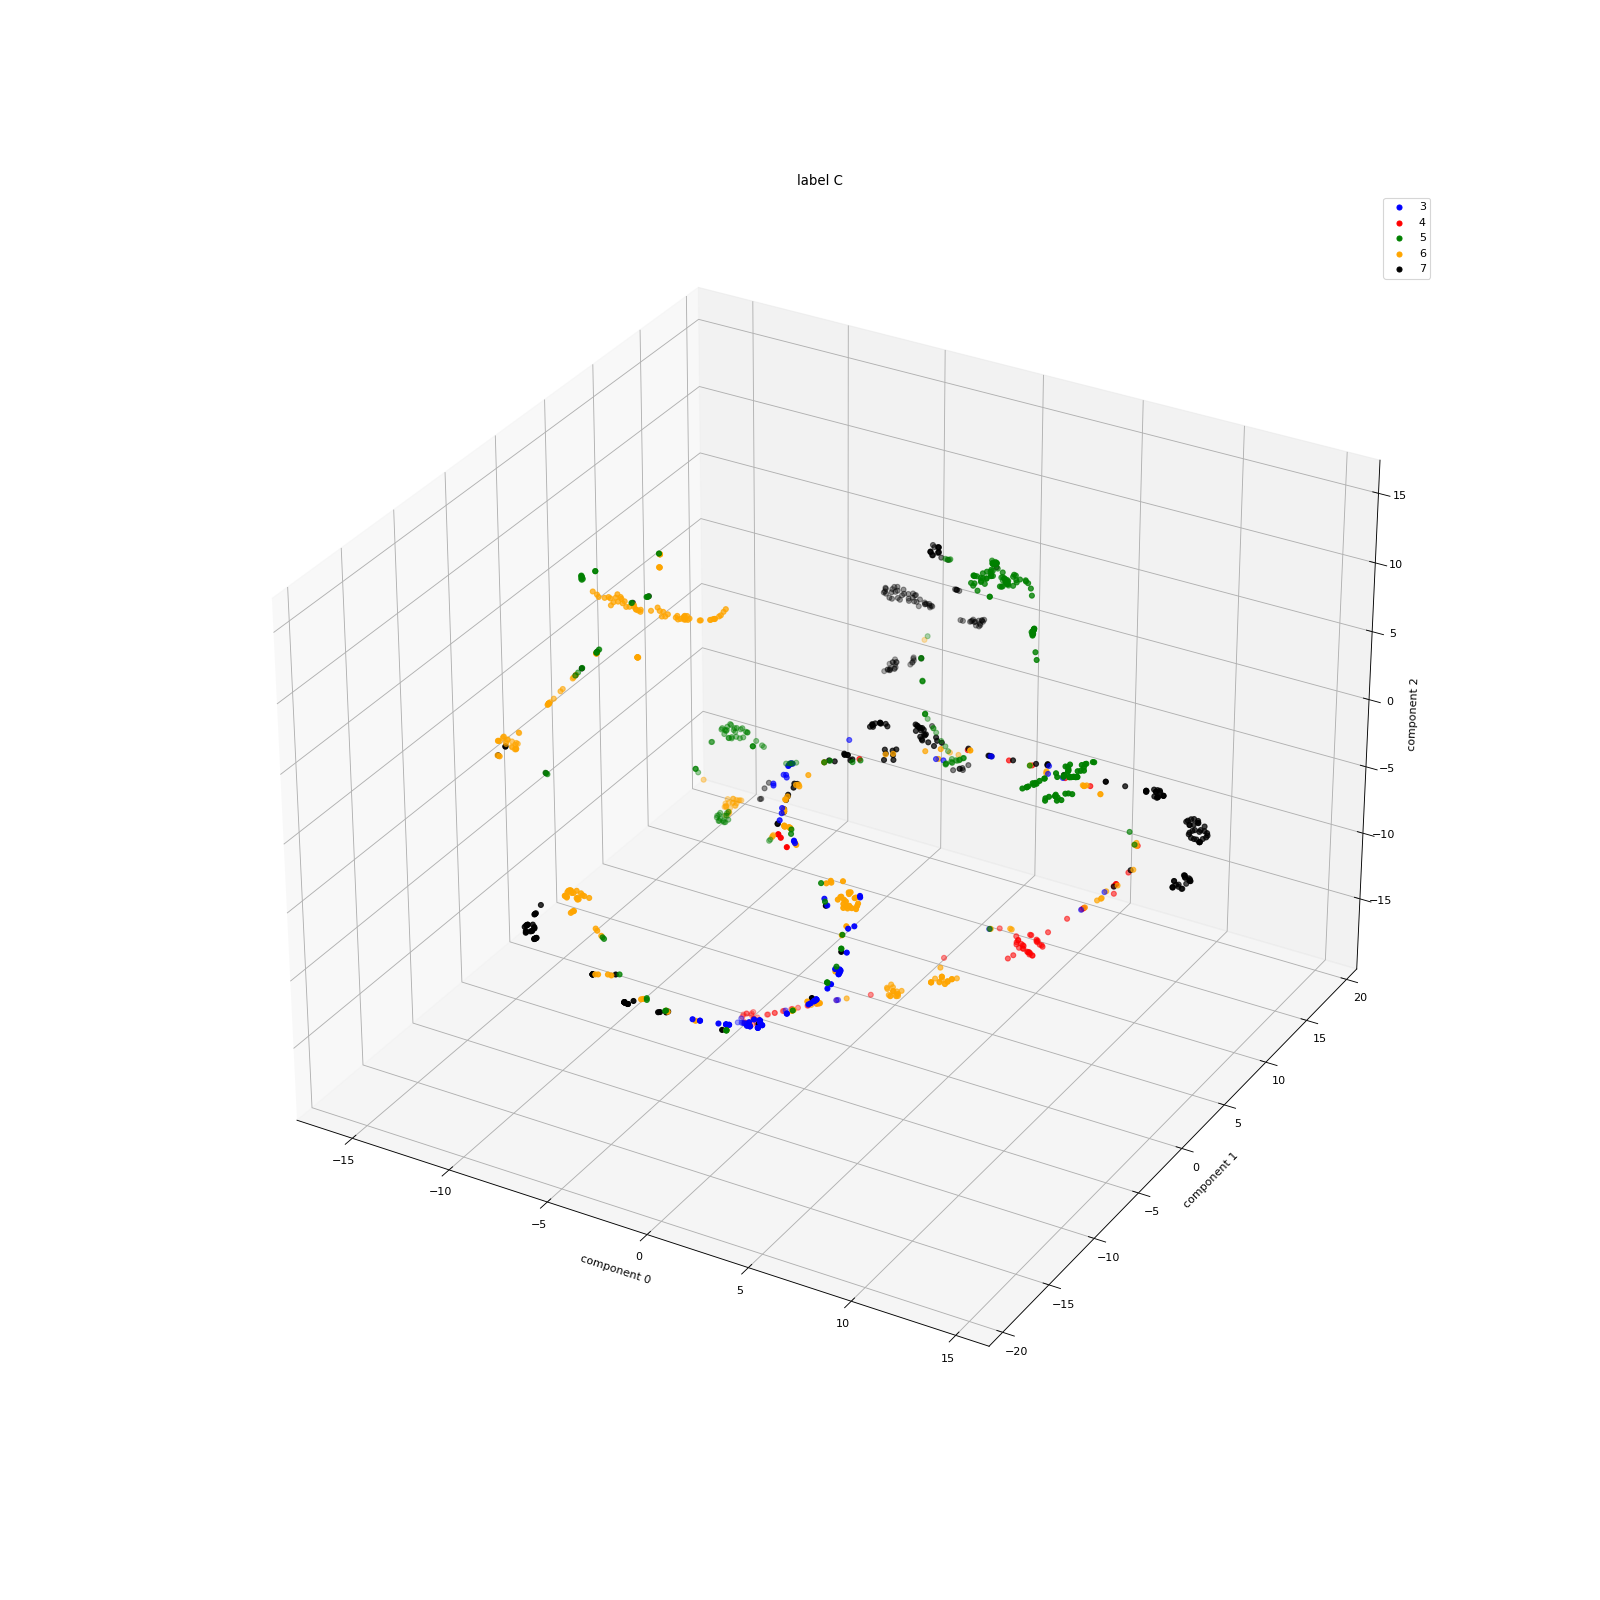

In [27]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

tsne3d = TSNE(n_components = 3, random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
df_C_tsne3d = tsne3d.fit_transform(df_B_t)

# numpy array -> DataFrame 변환
df_C_tsne3d = pd.DataFrame(df_C_tsne3d, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
df_C_tsne3d['order'] = df_B['order']

# target 별 분리
df_tsne3d_0 = df_C_tsne3d[df_C_tsne3d['order'] == 3]
df_tsne3d_1 = df_C_tsne3d[df_C_tsne3d['order'] == 4]
df_tsne3d_2 = df_C_tsne3d[df_C_tsne3d['order'] == 5]
df_tsne3d_3 = df_C_tsne3d[df_C_tsne3d['order'] == 6]
df_tsne3d_4 = df_C_tsne3d[df_C_tsne3d['order'] == 7]       #  <- 새 데이터셋 들어오면 추가하기

# target 별 시각화
ax.scatter(df_tsne3d_0['component 0'], df_tsne3d_0['component 1'], df_tsne3d_0['component 2'], color = 'blue', label = '3')
ax.scatter(df_tsne3d_1['component 0'], df_tsne3d_1['component 1'], df_tsne3d_1['component 2'], color = 'red', label = '4')
ax.scatter(df_tsne3d_2['component 0'], df_tsne3d_2['component 1'], df_tsne3d_2['component 2'], color = 'green', label = '5')
ax.scatter(df_tsne3d_3['component 0'], df_tsne3d_3['component 1'], df_tsne3d_3['component 2'], color = 'orange', label = '6')
ax.scatter(df_tsne3d_4['component 0'], df_tsne3d_4['component 1'], df_tsne3d_4['component 2'], color = 'black', label = '7')       #  <- 새 데이터셋 들어오면 추가하기

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()

plt.title("label C")
plt.show()